DecisionTree(Classification and Regression)
- ID3 algorithm(entropy)
    - entropy
        - measure of uncertainity
        - features having the lowest entropy value will be selected as rootnode
        - information gain(diff b/w entropy before and after splitting the data)
- CART algorithm(giniindex)
    - uses gini index
    - features having highest gini values will be selected as rootnode

In [2]:
from sklearn.datasets import load_iris
iris=load_iris()

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
iris.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [9]:
import pandas as pd
iris_df=pd.DataFrame(iris.data,columns=iris.feature_names)
iris_df["Target"]=iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [10]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Target               0
dtype: int64

In [12]:
x=iris_df.iloc[:,0:4]
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [13]:
y=iris_df["Target"]

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=25)

In [15]:
x_train.shape

(105, 4)

In [16]:
x_test.shape

(45, 4)

In [26]:
x_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
28,5.2,3.4,1.4,0.2
72,6.3,2.5,4.9,1.5
70,5.9,3.2,4.8,1.8
85,6.0,3.4,4.5,1.6
128,6.4,2.8,5.6,2.1
65,6.7,3.1,4.4,1.4
127,6.1,3.0,4.9,1.8
42,4.4,3.2,1.3,0.2
81,5.5,2.4,3.7,1.0
93,5.0,2.3,3.3,1.0


In [27]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [28]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [29]:
y_pred=model.predict(x_test)

In [30]:
y_pred

array([0, 1, 2, 1, 2, 1, 2, 0, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2, 1, 1, 1, 1,
       1, 0, 0, 2, 1, 2, 2, 0, 1, 2, 2, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0,
       2])

In [31]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(y_pred,y_test))
confusion_matrix(y_pred,y_test)

0.9333333333333333


array([[17,  0,  0],
       [ 0, 14,  1],
       [ 0,  2, 11]], dtype=int64)

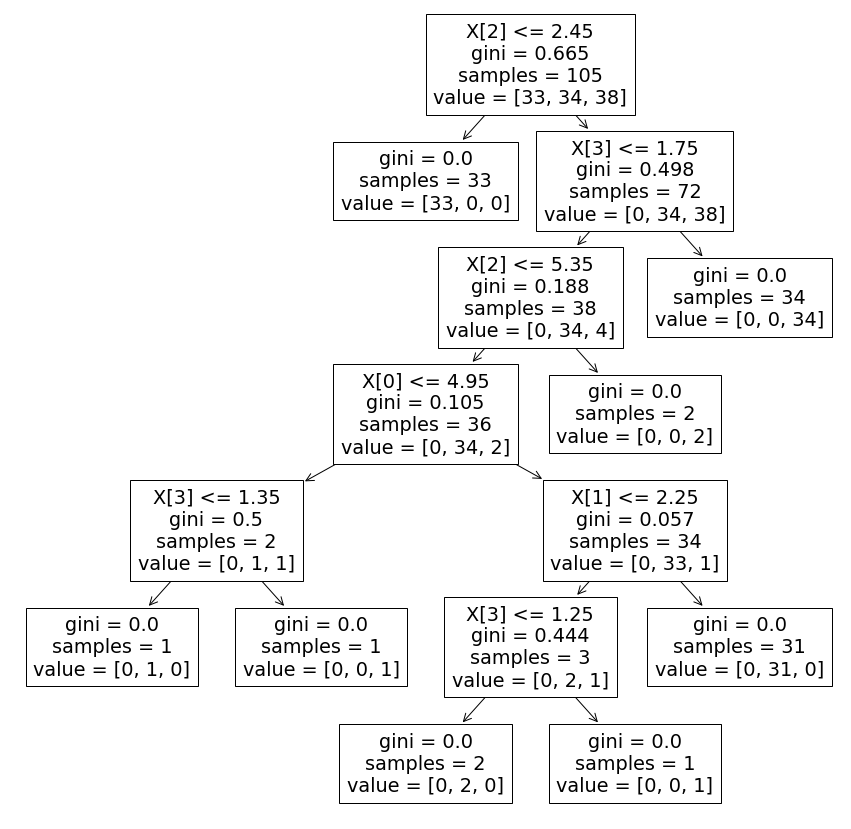

In [33]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
tree.plot_tree(model)
plt.show()

In [37]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion="entropy",max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

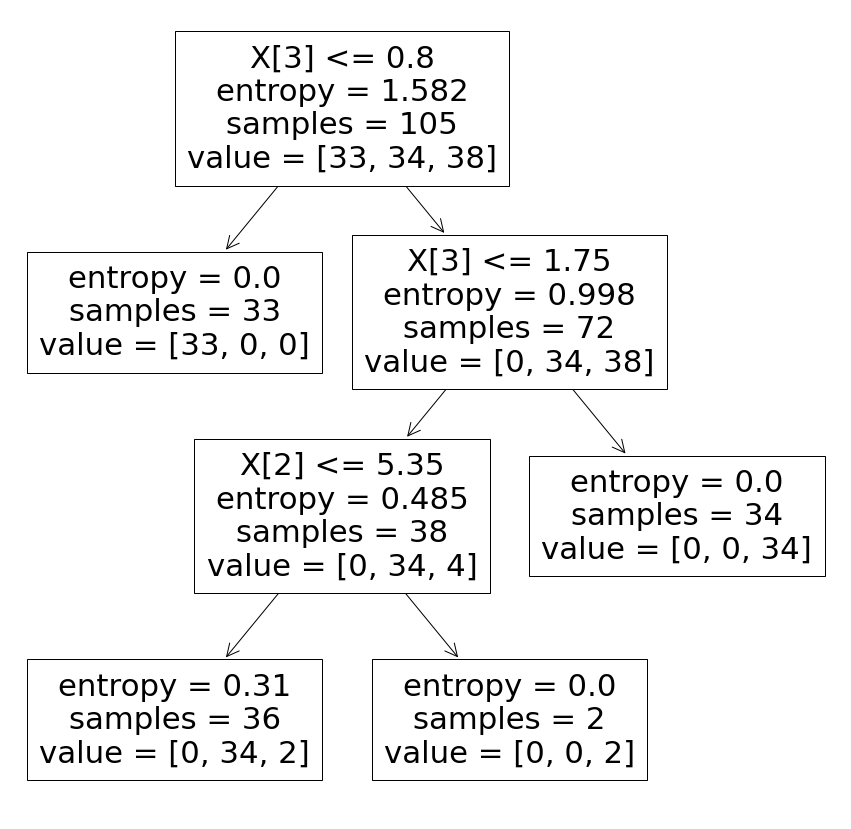

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
tree.plot_tree(model)
plt.show()

#### Random Forest regressor
- In decision tree we face overfitting(low bias,high variance)
- we can overcome the problem of overfitting in randomforest
- ensemble classifier
- group of decision tress and developing the trees based on random data fro the dataset
 so ,it is called as randomforest calssifier
- we select the ouptut based on ouput of every decision tree and define the highest repeated times output as predicted output

In [41]:
df=pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [42]:
df["target"].unique()

array([1, 0], dtype=int64)

In [43]:
x=df.drop("target",axis=1)

In [44]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [45]:
y=df["target"]

In [72]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=78)

In [73]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [74]:
y_pred=model.predict(x_test)

In [79]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print(precision_score(y_pred,y_test))
print(recall_score(y_pred,y_test))

0.8131868131868132
[[35  5]
 [12 39]]
0.8863636363636364
0.7647058823529411


In [77]:
df["target"].value_counts()


1    165
0    138
Name: target, dtype: int64

In [78]:
df.shape

(303, 14)

In [ ]:
PRED      0    1
ACT
0        TN    FP

1        FN    TP

ACCURACY---TP/TP+TN+FP+FN
PRECISION---TP/TP+FP
RECALL-----TP/TP+FN
F1SCORE----2*((PRECISION*RECALL)/(PRECISION+RECALL))

In [ ]:
Task:
Try to apply the automobiles dataset to regression in decisiontree and randomforest 